In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

### Modelo de red neuronal multicapa

In [2]:
class MultiLayerPerceptron(torch.nn.Module):
    
    def __init__(self, input_size, neurons_l1, neurons_l2):
        super().__init__()
        
        self.l1 = torch.nn.Linear(input_size, neurons_l1)
        self.l2 = torch.nn.Linear(neurons_l1, neurons_l2)
         
    def forward(self, x):
        hl_1 = torch.relu(self.l1(x))
        hl_2 = torch.sigmoid(self.l2(hl_1))
        
        return hl_2

### Generacion de datos

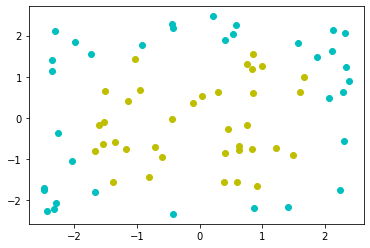

In [3]:
x_np = (np.random.rand(70,2)-.5) * 5
y_np = np.zeros(x_np.shape[0])

r = 1.7
y_np[((x_np[:,0] > r) | (x_np[:,0] < -r)) | ((x_np[:,1] > r) | (x_np[:,1] < -r)) ] = 1.

plt.scatter(x_np[:,0][y_np == 0], x_np[:,1][y_np == 0], c="y")
plt.scatter(x_np[:,0][y_np != 0], x_np[:,1][y_np != 0], c="c")

### Generacion de grilla de prueba

In [4]:
# Test grid points
resolution = 15
grid_points = np.zeros((resolution**2,2))
xv, yv = np.meshgrid(np.linspace(-2.5, 2.5, resolution), np.linspace(-2.5, 2.5, resolution))
grid_points[:,0] = xv.flatten()
grid_points[:,1] = yv.flatten()
grid_points_torch = torch.tensor(grid_points).float()

### Entrenamiento

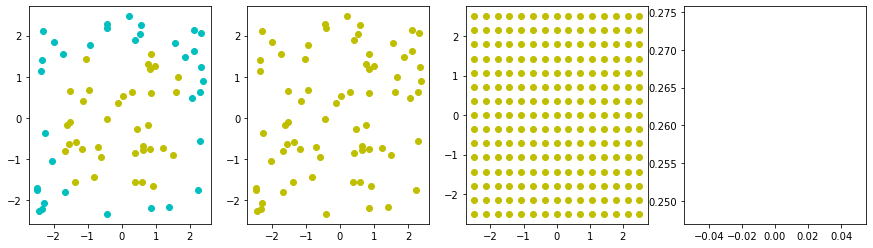

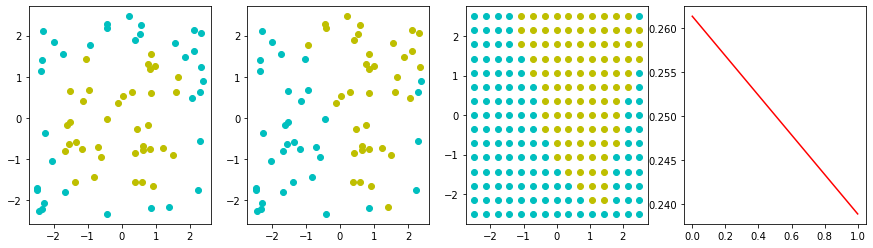

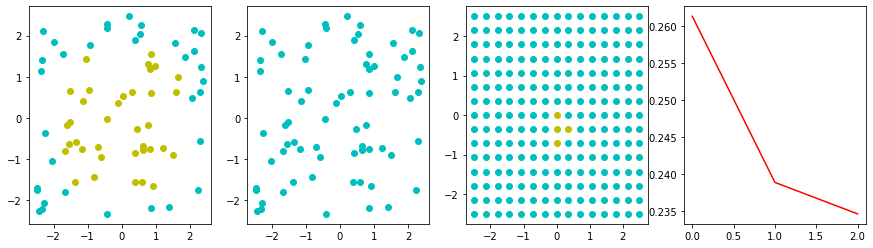

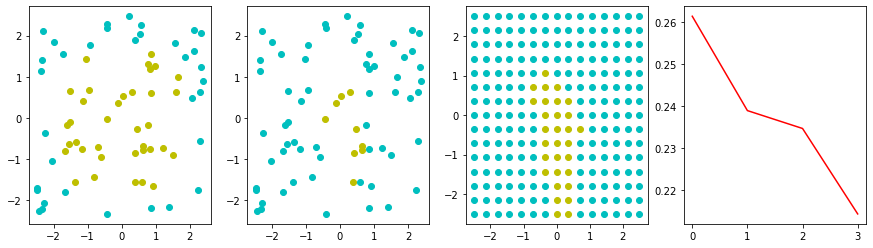

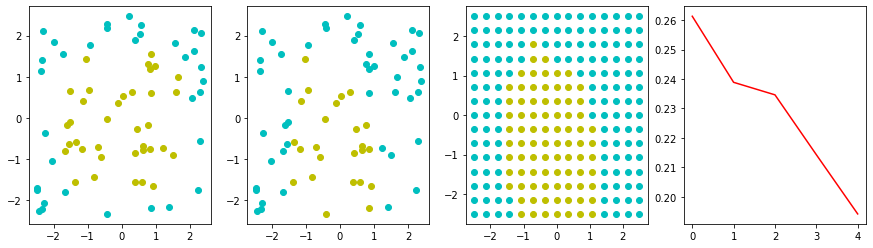

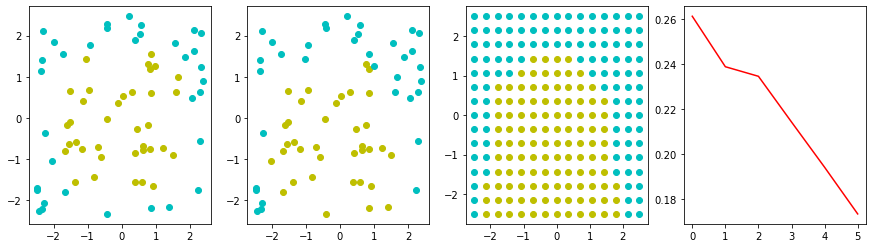

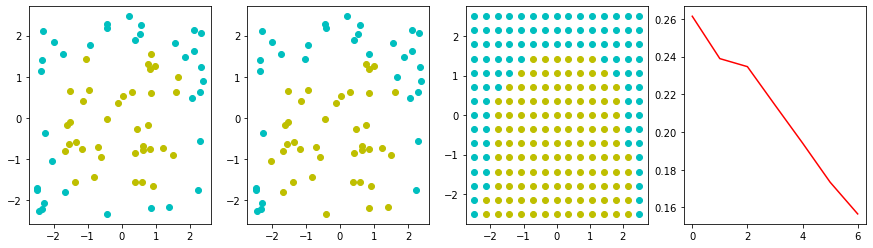

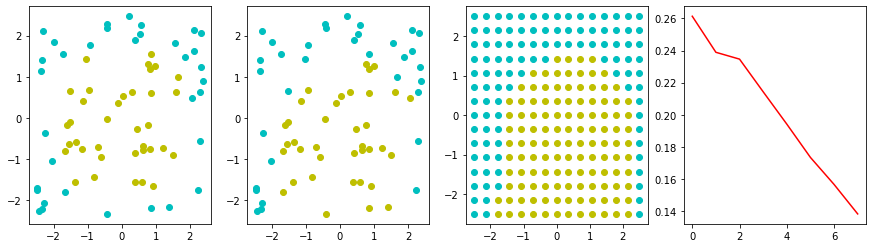

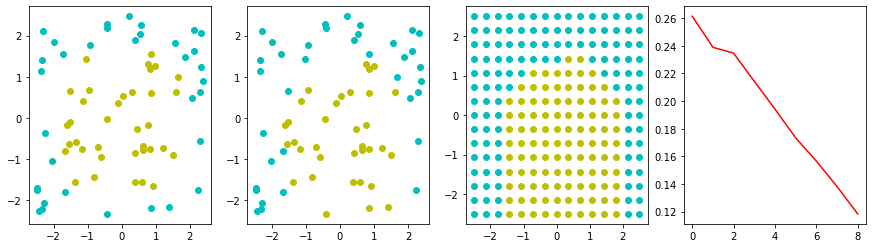

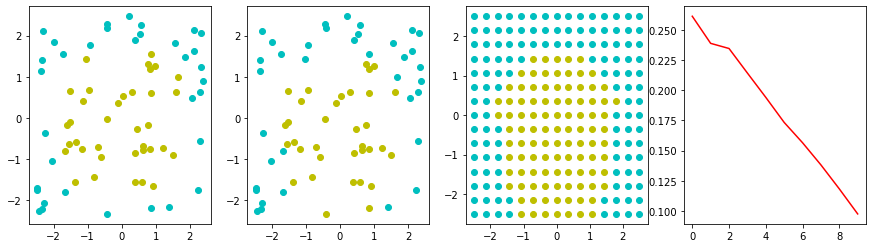

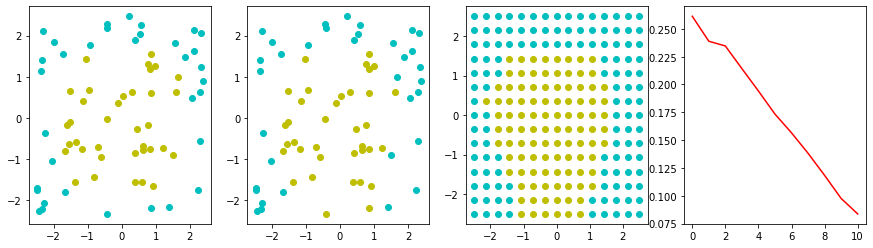

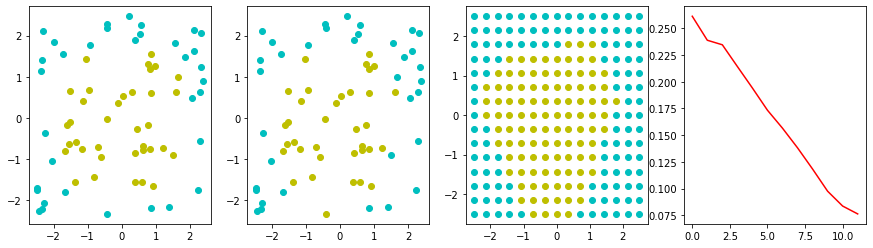

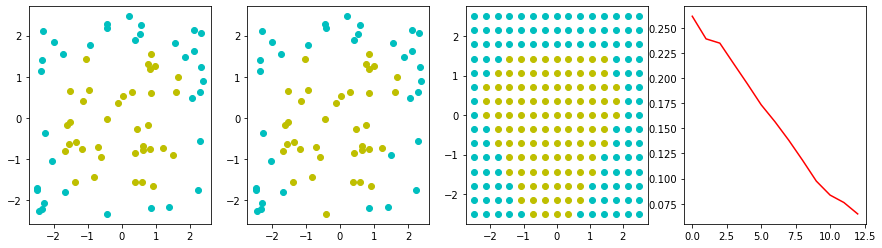

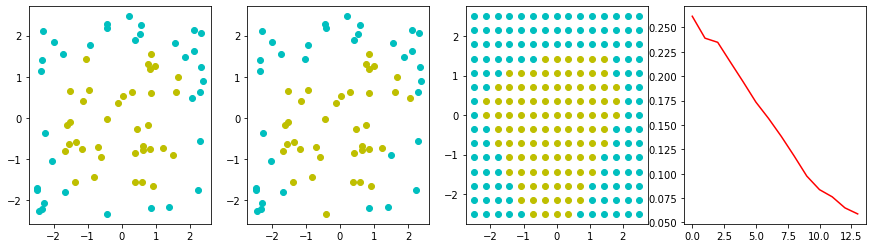

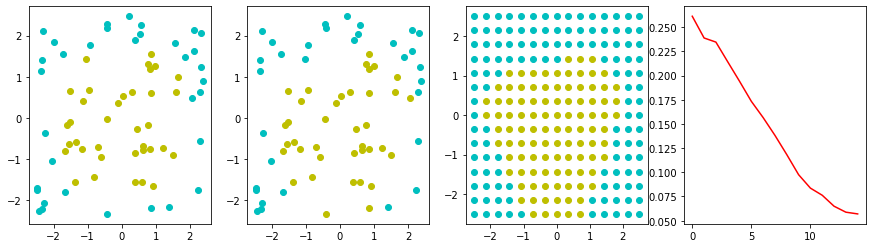

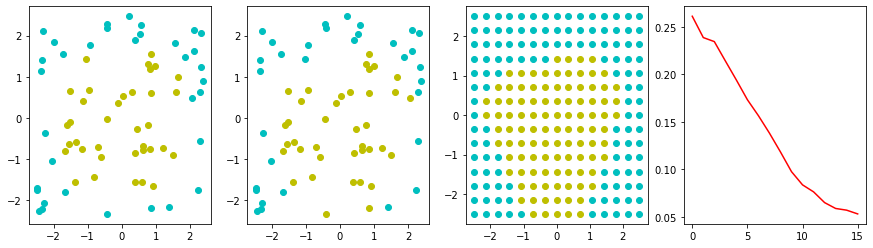

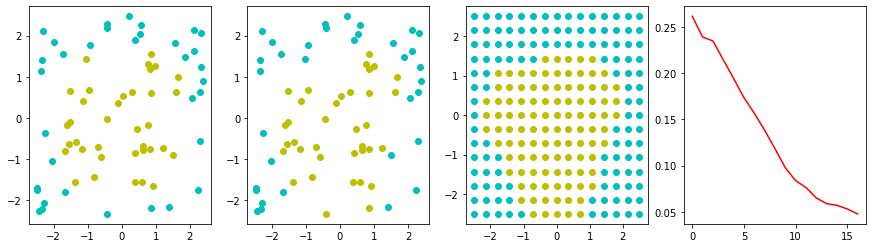

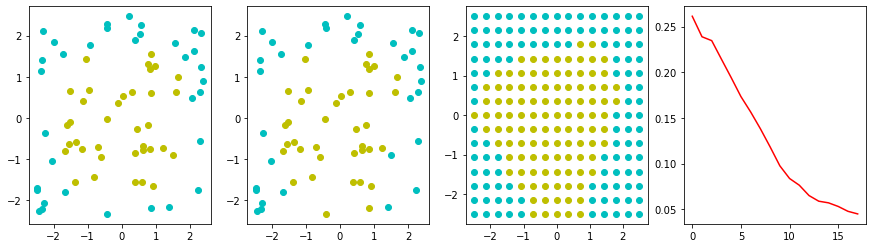

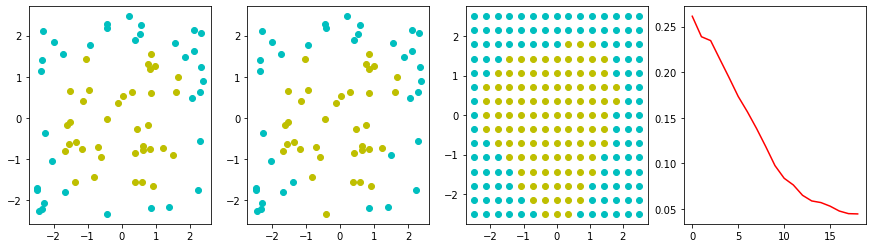

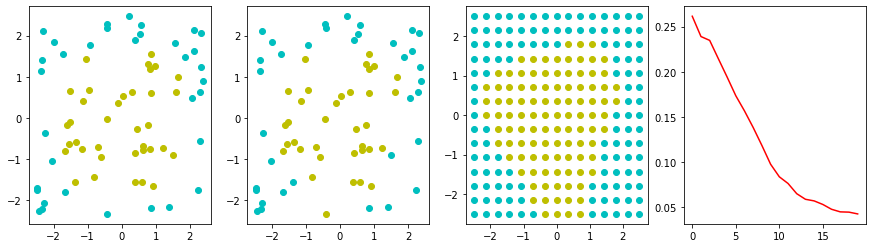

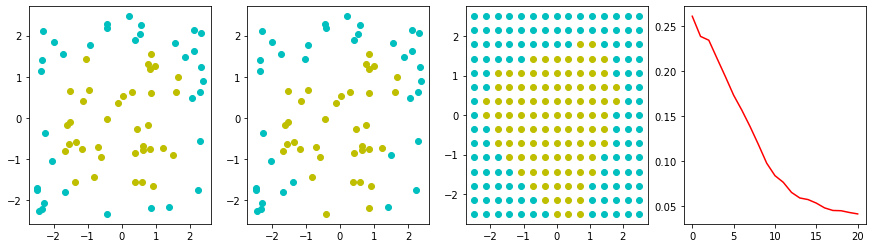

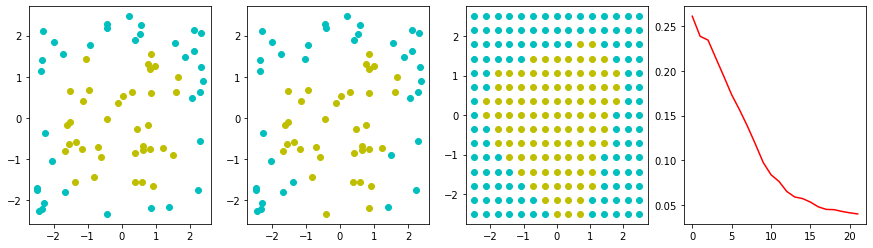

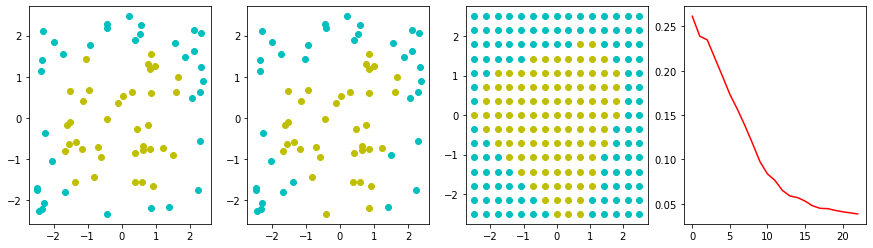

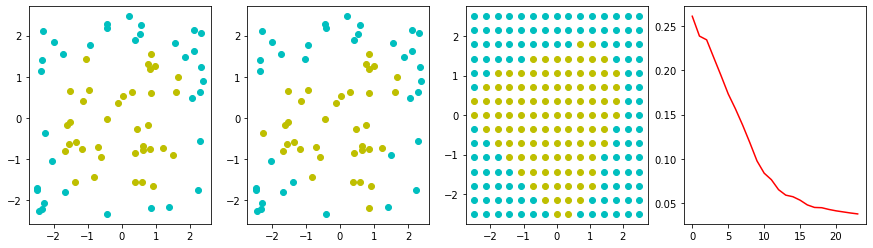

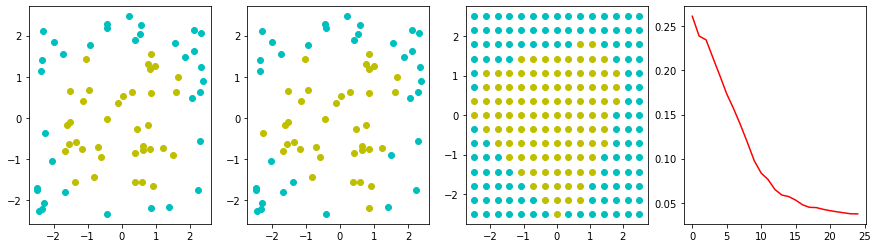

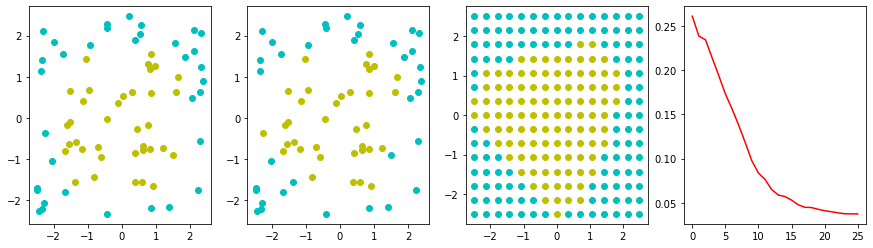

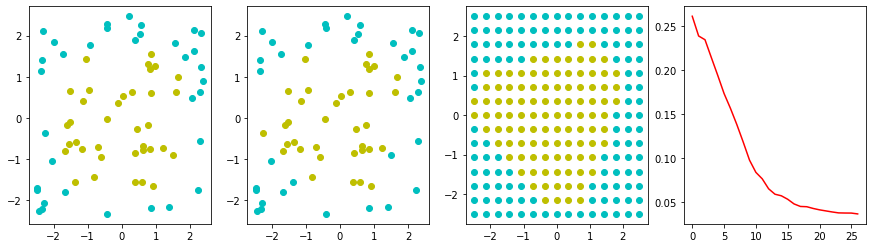

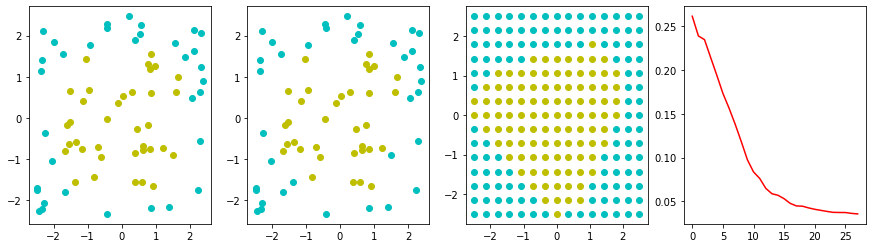

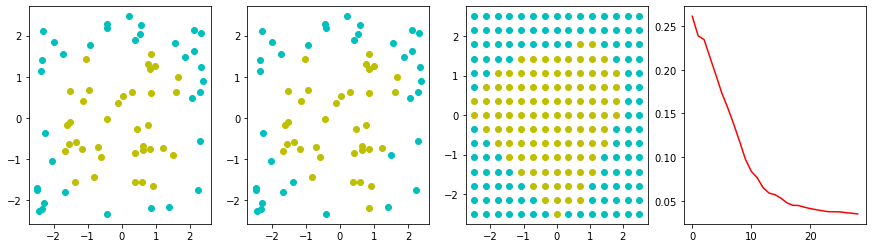

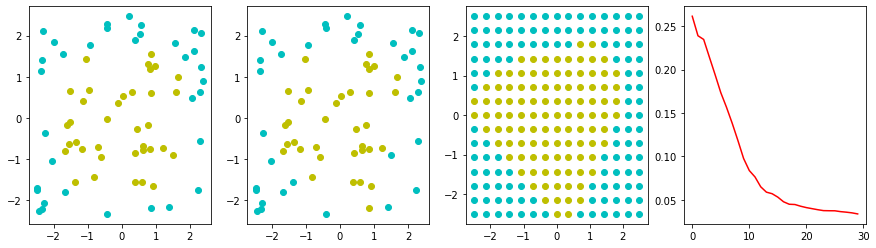

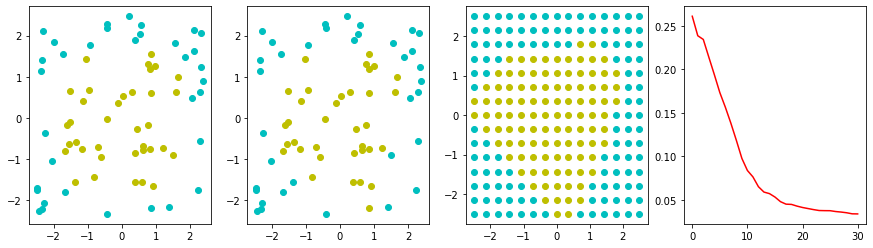

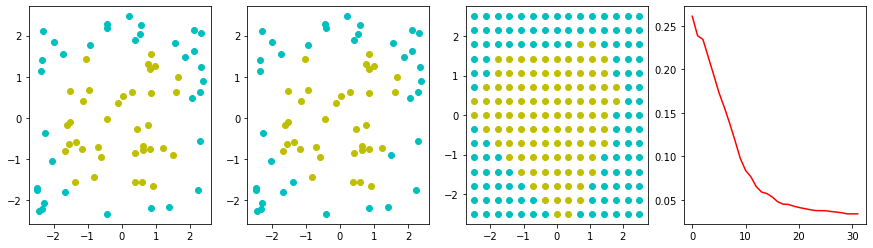

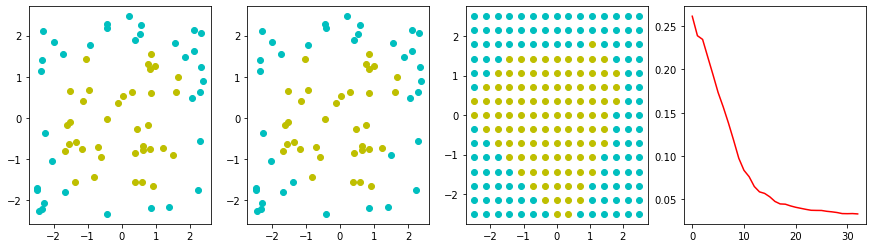

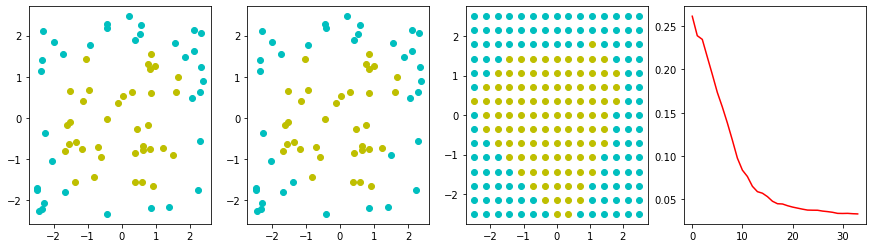

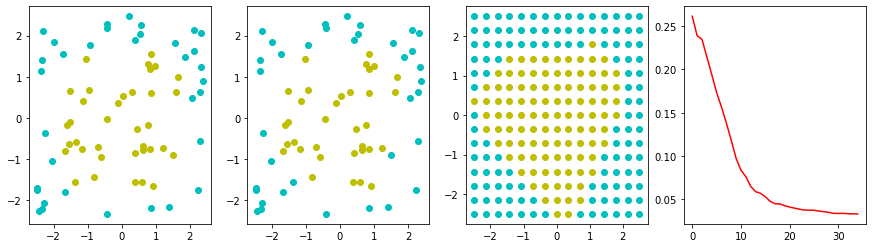

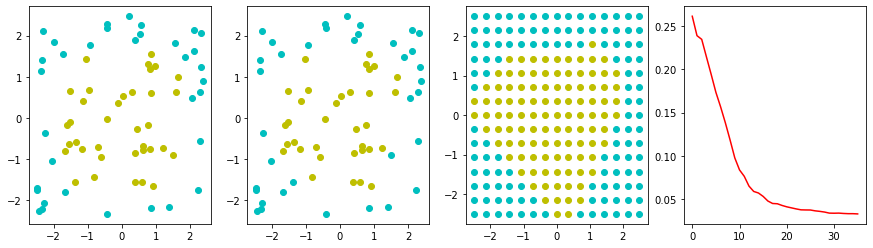

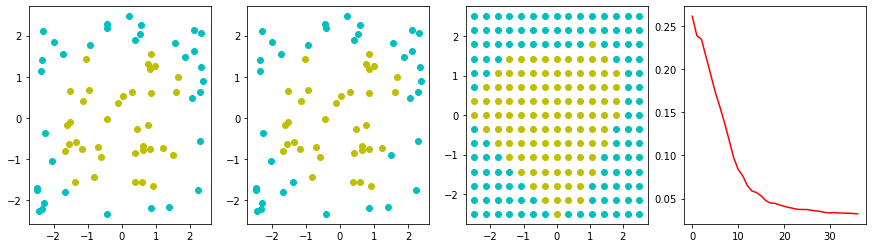

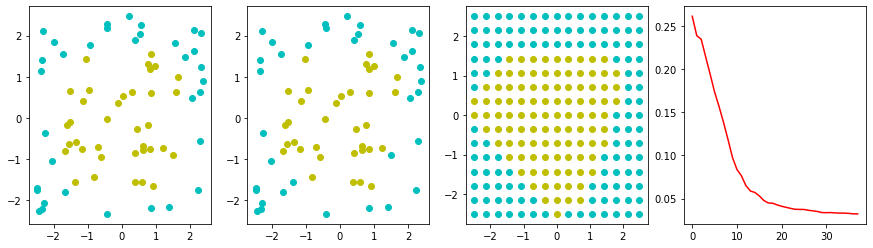

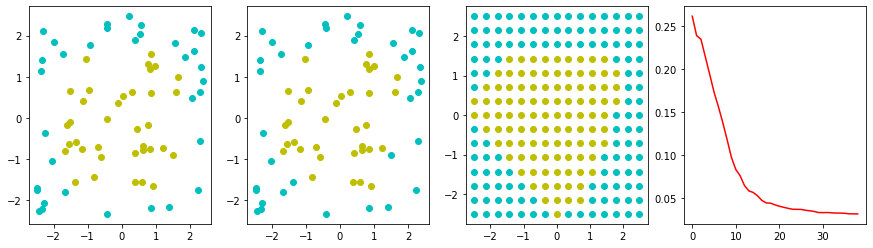

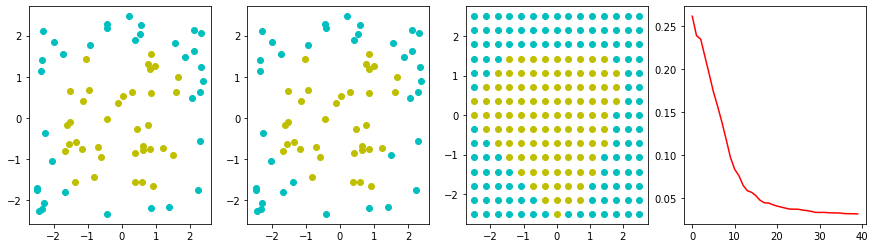

In [5]:
# Data points
x_training = torch.tensor(x_np).float()
y_training = torch.tensor(np.reshape(y_np,(len(y_np),1))).float()


lr = .2
iterations = 40

model = MultiLayerPerceptron(2,4,1)

loss_hist = []

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for t in range(iterations):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_training)
    y_pred_grid = model(grid_points_torch)
    # Compute and print loss
    loss = loss_fn(y_pred, y_training)
    
    loss_hist.append(loss.item())
    
    # Plot results
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    fig.set_figheight(4)
    fig.set_figwidth(15)
    
    ax1.scatter(x_training[:,0][y_training[:,0] <= 0.5], x_training[:,1][y_training[:,0] <= 0.5], c="y")
    ax1.scatter(x_training[:,0][y_training[:,0] >= 0.5], x_training[:,1][y_training[:,0] >= 0.5], c="c")
    
    ax2.scatter(x_training[:,0][y_pred[:,0] <= 0.5], x_training[:,1][y_pred[:,0] <= 0.5], c="y")
    ax2.scatter(x_training[:,0][y_pred[:,0] >= 0.5], x_training[:,1][y_pred[:,0] >= 0.5], c="c")
    
    ax3.scatter(grid_points[:,0][y_pred_grid[:,0] <= 0.5], grid_points[:,1][y_pred_grid[:,0] <= 0.5], c="y")
    ax3.scatter(grid_points[:,0][y_pred_grid[:,0] >= 0.5], grid_points[:,1][y_pred_grid[:,0] >= 0.5], c="c")
    
    ax4.plot(loss_hist,c = "r")
    plt.show()
    

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()